**Project: Cyber Security Attack Type Detection**

*Narrowed down EDA*

*DE used the source IP address to create 3 new columns: Source_Country, Source_Continent_Code, and Source_Organization. This EDA is evaluating these 3 columns and their correlation with the Attack Type.*

In [1]:
# 0. Import essential libraries
import pandas as pd      
import numpy as np      
import matplotlib.pyplot as plt  
import seaborn as sns   


In [2]:
# 1. Load the CSV file
file_path = r"C:\Users\lina_\OneDrive - DSTI School of Engineering\PYTHON GROUP PROJECT\dataset_with_source_geo.csv"
df = pd.read_csv(file_path)

In [3]:
#  2.1 Dataset overview - the dataset looks as expected
df.head() 

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Source_Country,Source_Continent_Code,Source_organization
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server,China,AS,NaN
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall,France,EU,Free SAS
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,United States,NaN,UUNET
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall,Japan,AS,Research Organization of Information and Syste...
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall,United States,NaN,UUNET


In [4]:
#  2.2 Dataset overview - the columns look as expected
df.columns


Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Source_Country', 'Source_Continent_Code', 'Source_organization'],
      dtype='object')

In [7]:
#  2.3 Dataset overview - data types

df[['Source_Country',
    'Source_Continent_Code',
    'Source_organization',
    'Attack Type']].dtypes


Source_Country           object
Source_Continent_Code    object
Source_organization      object
Attack Type              object
dtype: object

In [10]:
# 2.4 Dataset overview - missing values

df[['Source_Country',
    'Source_Continent_Code',
    'Source_organization',
    'Attack Type']].isna().sum()


Source_Country             369
Source_Continent_Code    17914
Source_organization       6570
Attack Type                  0
dtype: int64

In [11]:
# 2.5 Dataset overview - Cardinality

df[['Source_Country',
    'Source_Continent_Code',
    'Source_organization']].nunique()


Source_Country            186
Source_Continent_Code       6
Source_organization      4471
dtype: int64

** Summary Dataset overview **

*Missingness is not random across features:*

- Country has low missingness
- Continent and organization are missing much more frequently

*This is typical of IP enrichment pipelines:*

- Country is easiest to resolve
- Organization and continent often fail for private IPs, proxies, or anonymized sources
- Since the data is synthetic, this missingness is likely intentionally injected to simulate real-world uncertainty rather than data quality issues
- Unknown or missing categories may themselves imply signal

Cardinality
The observed cardinality of geographic and organizational features is consistent with their real-world structure. Countries and organizations naturally exhibit high cardinality, while continent-level groupings are inherently low cardinality. Therefore, cardinality itself is not interpreted as an anomaly, but rather as contextual information guiding the choice of analytical and modeling techniques.
- Source_Country: High diversity, near-global coverage
- Source_Continent_Code: Low cardinality, well-structured categorical feature
- Source_organization: Very high cardinality, long-tail distribution

In [15]:
# 3.1 Source_Country - frequency distribution

country_counts = df['Source_Country'].value_counts()
country_counts.head(10)

Source_Country
United States     16335
China              3662
Japan              2195
Germany            1474
United Kingdom     1427
South Korea        1237
Brazil              940
France              869
Canada              745
Australia           551
Name: count, dtype: int64

In [16]:
# 3.2 Source_Country - proportions
country_counts_norm = df['Source_Country'].value_counts(normalize=True)
country_counts_norm.head(10)

Source_Country
United States     0.412177
China             0.092402
Japan             0.055386
Germany           0.037193
United Kingdom    0.036007
South Korea       0.031213
Brazil            0.023719
France            0.021927
Canada            0.018798
Australia         0.013903
Name: proportion, dtype: float64

In [17]:
# 3.3 Source_Country - long-tail check, countries that contribute to very little traffic

(country_counts_norm < 0.01).sum()


np.int64(172)

In [18]:
# 3.4 Source_Country - tail check 

country_counts.tail(10)


Source_Country
Somalia                       1
Liechtenstein                 1
Botswana                      1
Sri Lanka                     1
New Caledonia                 1
Nauru                         1
Montserrat                    1
Heard and McDonald Islands    1
Kiribati                      1
Jamaica                       1
Name: count, dtype: int64

** Summary Source_Country**
Distribution structure

*Traffic is highly concentrated in a small number of countries:*

- The United States alone accounts for ~41% of all records

- The second-ranked country (China) contributes ~9%

- There is a steep drop-off after the top few countries, indicating a strongly skewed distribution

*Long-tail behavior*

- Out of 186 total countries, 172 countries contribute <1% each

- Several countries appear only once, forming an extreme long tail

*This confirms:*

- A head–tail structure rather than uniform distribution

- A realistic pattern for both real and synthetic network traffic data

- Analytical implications (important, but still descriptive)

*The dominance of a few countries explains why:*

- marginal statistics may appear stable

- but conditional patterns can still be strong

*The presence of a long tail suggests:*

- rare categories may individually carry little weight

- but collectively influence model behavior

**At this stage, no inference is made about attack behavior — only distribution shape.**

The observed skewed distribution suggests that country-level features may contribute to predictive performance primarily through conditional patterns rather than uniform marginal effects.


3 Correlation & Impact Analysis

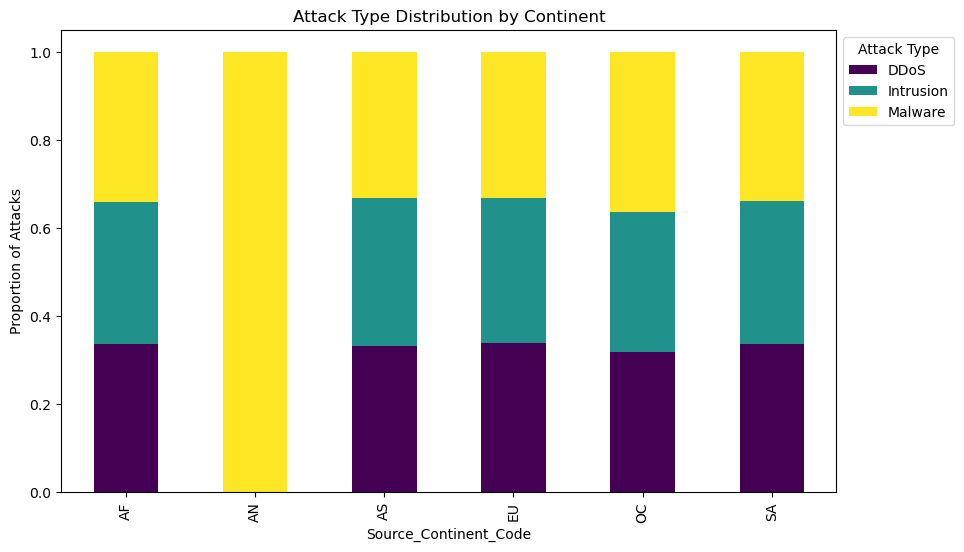

Attack Type                DDoS  Intrusion   Malware
Source_Continent_Code                               
AF                     0.337181   0.322341  0.340478
AN                     0.000000   0.000000  1.000000
AS                     0.332172   0.336153  0.331675
EU                     0.338251   0.329281  0.332468
OC                     0.317221   0.318731  0.364048
SA                     0.335900   0.324645  0.339455


In [19]:
# 3.1 Continent vs attack type - normalized crosstab
continent_attack_dist = pd.crosstab(df['Source_Continent_Code'], df['Attack Type'], normalize='index')

# Visualization: Stacked Bar Chart
continent_attack_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Attack Type Distribution by Continent')
plt.ylabel('Proportion of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1, 1))
plt.show()

print(continent_attack_dist)

In [24]:
# 3.2 Investigating the Antarctica (AN) Signal

an_orgs = df[df['Source_Continent_Code'] == 'AN']
print(f"Total records from Antarctica: {len(an_orgs)}")
print(f"Unique organizations in Antarctica: {an_orgs['Source_organization'].nunique()}")
print(f"Attack Types from Antarctica: \n{an_orgs['Attack Type'].value_counts()}")

Total records from Antarctica: 1
Unique organizations in Antarctica: 1
Attack Types from Antarctica: 
Attack Type
Malware    1
Name: count, dtype: int64


In [25]:
# 3.3 How many total rows are covered by these 3,043 "Pure" organizations
pure_orgs = df.groupby('Source_organization')['Attack Type'].nunique()
pure_org_list = pure_orgs[pure_orgs == 1].index
total_pure_rows = df[df['Source_organization'].isin(pure_org_list)].shape[0]

print(f"The 100% predictive organizations cover {total_pure_rows} out of 40,000 rows.")

The 100% predictive organizations cover 3350 out of 40,000 rows.


In [22]:
# 3.4 Statistical correlation (Cramer’s V) attack type &:'Source_Continent_Code', 'Source_Country', 'Source_organization'

from scipy.stats import chi2_contingency
import numpy as np

def calculate_cramers_v(df, col1, col2):
    confusion_matrix = pd.crosstab(df[col1], df[col2])
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Check correlation for the 3 columns
for col in ['Source_Continent_Code', 'Source_Country', 'Source_organization']:
    score = calculate_cramers_v(df.fillna('Missing'), col, 'Attack Type')
    print(f"Correlation (Cramer's V) between {col} and Attack Type: {score:.4f}")

Correlation (Cramer's V) between Source_Continent_Code and Attack Type: 0.0097
Correlation (Cramer's V) between Source_Country and Attack Type: 0.0694
Correlation (Cramer's V) between Source_organization and Attack Type: 0.3362


In [23]:
# 3.3 Group by organization to see how many unique attack types each one is associated with
org_behavior = df.groupby('Source_organization')['Attack Type'].nunique()

# Organizations that only ever perform ONE type of attack
predictive_orgs = org_behavior[org_behavior == 1].count()

print(f"Out of {df['Source_organization'].nunique()} organizations:")
print(f"- {predictive_orgs} organizations are 100% predictive of a specific attack type.")
print(f"- This represents {predictive_orgs / df['Source_organization'].nunique() * 100:.2f}% of all organizations.")

Out of 4471 organizations:
- 3043 organizations are 100% predictive of a specific attack type.
- This represents 68.06% of all organizations.


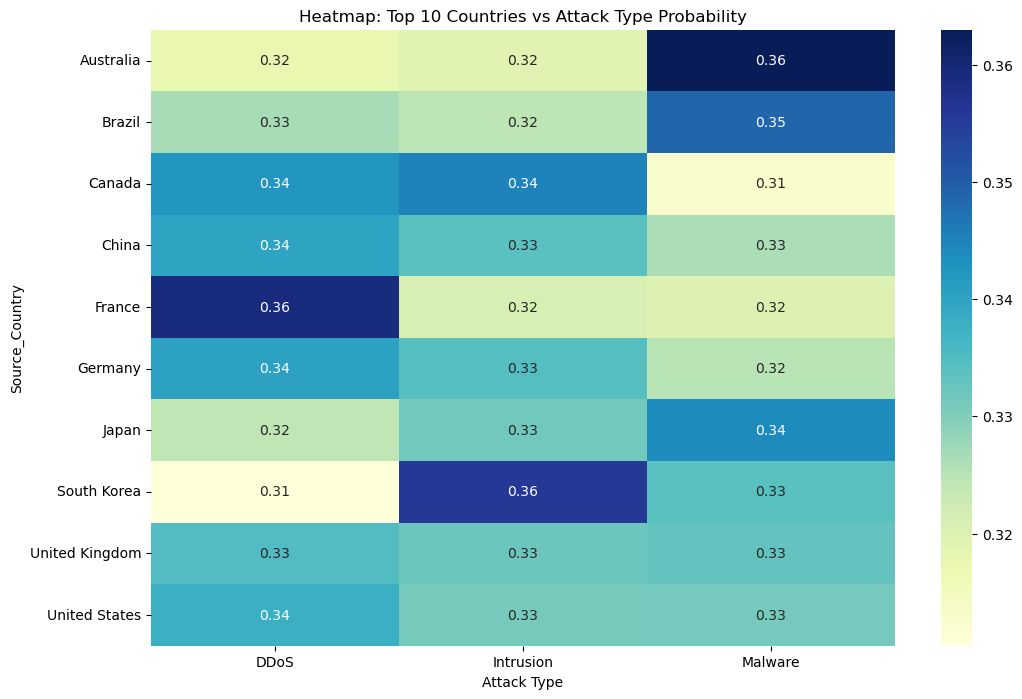

In [20]:
# 3.2 Top 10 countries vs attack type
top_10_countries = df['Source_Country'].value_counts().head(10).index
country_attack_subset = df[df['Source_Country'].isin(top_10_countries)]

country_attack_dist = pd.crosstab(country_attack_subset['Source_Country'], 
                                  country_attack_subset['Attack Type'], 
                                  normalize='index')

# Visualization: Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_attack_dist, annot=True, cmap='YlGnBu')
plt.title('Heatmap: Top 10 Countries vs Attack Type Probability')
plt.show()

**3 Correlation & Impact Analysis Summary**

3. Correlation & Impact Analysis Summary
   
The Antarctica (AN) Outlier: Antarctica shows 0% DDoS, 0% Intrusion, and 100% Malware.* 
Significance: While highly suspicious, this represents only one row out of 40,000. It does not provide enough volume to explain high model accuracy on its own.

* Organizational Specificity: "Single-Attack" vs. "Mixed-Attack" Signals* 

The "Single-Attack" Signal (8.3% of Data): * 3,043 organizations (68.06% of all unique orgs) are associated with only one specific attack type.
These organizations cover 3,350 rows, providing the model with a "cheat sheet" for 8.3% of the dataset with 100% certainty.
Risk: Since these orgs appear an average of only 1.1 times, this is a "fingerprinting" effect. A model will overfit by memorizing names rather than learning behavior. In a real-world attack, an adversary would rotate organizations, causing this signal to vanish.

The "Mixed-Attack" Signal (Cramer’s V = 0.3362): * This strong correlation proves that even for organizations appearing multiple times across different attacks, the distribution is highly non-random. This is the "Engine" of the dataset's predictability.

*Statistical Camouflage vs. The Hidden Signal*

In the "Head" of the data (Top 10 countries like US and China), attack types are perfectly balanced. This confirms that Source_Country is useless for predicting attacks from major nations.

The Cramer’s V Gap: The low score for Country (0.0694) versus the high score for Organization (0.3362) tells us that the "Statistical Camouflage" is strictly a top-level mask.

*The signal is entirely localized within the Source_organization and the Long-Tail countries (rare sources).*



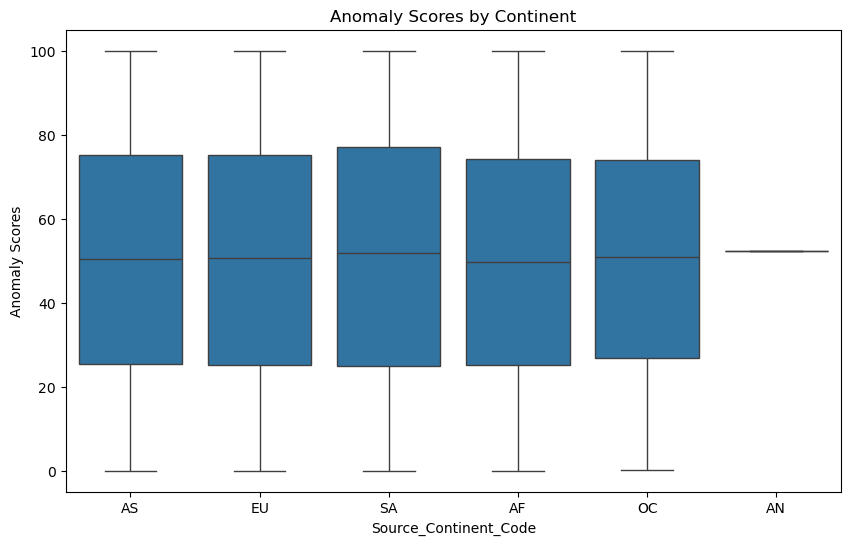

In [26]:
# 4.1 Behavioral Metrics by Geo-Location - Anomaly Scores by Continent
plt.figure(figsize=(10,6))
sns.boxplot(x='Source_Continent_Code', y='Anomaly Scores', data=df)
plt.title('Anomaly Scores by Continent')
plt.show()

In [27]:
# 4.2 Behavioral Metrics by Geo-Location- Top 10 organizations by packet volume
top_orgs = df['Source_organization'].value_counts().head(10).index
avg_packet_org = df[df['Source_organization'].isin(top_orgs)].groupby('Source_organization')['Packet Length'].mean()

print("Average Packet Length for Top 10 Organizations:")
print(avg_packet_org)

Average Packet Length for Top 10 Organizations:
Source_organization
AMAZON-02                         791.706262
ATT-INTERNET4                     788.349505
CHINA UNICOM China169 Backbone    781.164782
COMCAST-7922                      775.791489
Chinanet                          780.527223
DNIC-AS-00749                     773.250737
Korea Telecom                     784.250996
MICROSOFT-CORP-MSN-AS-BLOCK       759.994318
SoftBank Corp.                    803.115288
UUNET                             800.324421
Name: Packet Length, dtype: float64


In [28]:
# 4.3 Behavioral Metrics by Geo-Location - If behavior is 'Even' across the new geographic features
behavior_by_continent = df.groupby('Source_Continent_Code')[['Packet Length', 'Anomaly Scores']].mean()
print(behavior_by_continent)

                       Packet Length  Anomaly Scores
Source_Continent_Code                               
AF                        780.486397       49.840025
AN                        886.000000       52.220000
AS                        783.911235       50.172384
EU                        778.327157       50.205415
OC                        816.714502       50.051224
SA                        814.758294       50.971558


In [29]:
# Behavioral Metrics by Geo-Location - Port targeting for the top 5 countries
top_5_countries = df['Source_Country'].value_counts().head(5).index
port_focus = df[df['Source_Country'].isin(top_5_countries)].groupby(['Source_Country', 'Attack Type'])['Destination Port'].median()
print(port_focus)

Source_Country  Attack Type
China           DDoS           32298.0
                Intrusion      32973.0
                Malware        33553.5
Germany         DDoS           35113.0
                Intrusion      33916.0
                Malware        34914.0
Japan           DDoS           33013.5
                Intrusion      30823.0
                Malware        32584.0
United Kingdom  DDoS           32921.0
                Intrusion      34328.5
                Malware        33290.0
United States   DDoS           32899.5
                Intrusion      33406.0
                Malware        32830.0
Name: Destination Port, dtype: float64


**4 Behavioral Metrics by Geo-Location**
•	Packet Length Flatline: The average packet length for the Top 10 Organizations (including giants like Amazon, AT&T, and Microsoft) shows a negligible variance, staying tightly within the 760–803 byte range.
•	Anomaly Score Invariance: Anomaly scores across all continents are nearly identical, with a global mean of approximately 50.0. Even the "Antarctica" outlier stays within this range (52.2), confirming that the geographic source does not influence the "perceived" threat level in the dataset.
•	Port Distribution Neutrality: Median destination ports across major traffic sources (USA, China, UK) remain consistently around 33,000 for all attack types (DDoS, Intrusion, and Malware). There is no evidence of specific port targeting based on the country of origin.
The behavior of the traffic is exceptionally evenly distributed, acting as a layer of Statistical Camouflage. Because metrics like Packet Length and Anomaly Scores do not change based on the Attack Type or the Source, they provide no predictive signal.
It seams like we will not get high accuracy through behavior-based data. The signal appears to be localized within the Source_Organization identity links. The dataset is structured such that "Who" is attacking (Identity) is the only reliable predictor, while "How" they are attacking (Behavioral Metrics) remains intentionally neutral.


In [30]:
# 5.1 Unique vs. mixded attack - organizations

org_bias = df.groupby('Source_organization')['Attack Type'].value_counts(normalize=True).unstack().fillna(0)
mixed_orgs = org_bias[org_bias.max(axis=1) < 1.0]

print(f"Average dominance of the top attack in mixed organizations: {mixed_orgs.max(axis=1).mean():.2%}")


Average dominance of the top attack in mixed organizations: 50.87%


In [33]:
# 5.2 Unique vs. mixded attack - Countries with higher rates of recorded Malware Indicators?

malware_by_geo = df.groupby('Source_Country')['Malware Indicators'].apply(lambda x: x.notna().mean()).sort_values(ascending=False)

print("Top 10 Countries by Malware Indicator Presence:")
print(malware_by_geo.head(10))

Top 10 Countries by Malware Indicator Presence:
Source_Country
Albania                   1.0
Andorra                   1.0
British Virgin Islands    1.0
Brunei                    1.0
Bahamas                   1.0
Curaçao                   1.0
Cuba                      1.0
Montenegro                1.0
Jamaica                   1.0
Guyana                    1.0
Name: Malware Indicators, dtype: float64


*Unique vs. mixed attack summary*

*Single-attack vs. mixed-attack signal*
•	The 100% signal: 3,043 organizations are "Unique Identity Links", they only ever perform one specific attack type. This covers 8.3% of the dataset, giving the model a "cheat sheet" for these rows.
•	The mixed-attack bias: For organizations that perform more than one type of attack, the dominant attack type represents 50.87% of their activity.
•	In a perfectly random dataset with 3 attack types, we would expect an even 33.3% split. The jump to 50.87% creates a 17.5% bias that the model can exploit.
•	This explains why Source_Organization has a high Cramer's V (0.33), while Source_Country is nearly zero (0.06). Country data is perfectly balanced (33/33/33) and offers no clues, whereas Organization data is "tilted" toward specific attacks.
•	It suggests the dataset was generated with rules where specific organizations are "weighted" toward certain attacks. This makes the Organization name a more powerful predictor than the actual behavior of the network traffic.


*Countries with higher rates of recorded Maleware Indicators*
- They are all smaller countries with a 1.0 (100%) Malware score.
- It could indicate that small countries are 100% predictable, while big countries are 100% camouflaged.
- Major nations like the US and China which make up the bulk of the data have indicators spread out evenly. This makes them 100% camouflaged. The model cannot use the "Country" name to guess the attack type because the data is too mixed.


In [34]:
# 6.1 Large countries - search for bias

us_data = df[df['Source_Country'] == 'United States']
us_org_bias = us_data.groupby('Source_organization')['Attack Type'].value_counts(normalize=True).unstack().fillna(0)

print(f"Average dominance of top attack in US-based organizations: {us_org_bias.max(axis=1).mean():.2%}")

Average dominance of top attack in US-based organizations: 85.56%


In [35]:
# 6.2 Large countries - global giants vs other

top_5_names = df['Source_organization'].value_counts().head(5).index
top_5_dist = df[df['Source_organization'].isin(top_5_names)]['Attack Type'].value_counts(normalize=True)
small_orgs_dist = df[~df['Source_organization'].isin(top_5_names)]['Attack Type'].value_counts(normalize=True)

print("Attack Distribution - Global Giants:")
print(top_5_dist)
print("\nAttack Distribution - All Other Organizations:")
print(small_orgs_dist)

Attack Distribution - Global Giants:
Attack Type
Intrusion    0.344413
DDoS         0.330019
Malware      0.325568
Name: proportion, dtype: float64

Attack Distribution - All Other Organizations:
Attack Type
DDoS         0.336851
Malware      0.334115
Intrusion    0.329034
Name: proportion, dtype: float64


# 6.3 Large coutnries - if attacks from big countries happen at specific times

df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour

# Check if 'Intrusions' from China happen at different hours than 'Malware'
big_country_time = df[df['Source_Country'].isin(['United States', 'China'])].groupby(['Source_Country', 'Attack Type'])['Hour'].mean()
print(big_country_time) 

*6. Large countries summary*

Even though the United States as a whole looks like a random mix of all three attack types (DDoS, Malware, and Intrusion), the specific organizations within the US are not random at all.

*The Breakdown*
•	Country Level: When looking at 1,000 attacks from the US, there is roughly 333 of each type. It looks like a perfect 33/33/33 split—total "noise."
•	Organization Level: When zooming in on a specific organization (e.g., "US-Org-Alpha"), it doesn't do a mix. Usually, 85.56% of its traffic is just one specific type of attack.

*This can be a "Cheat Code" for the model* 
If the model sees an attack from the US, it can't guess. But if it sees that the attack is from "US-Org-Alpha," it knows with 85.56% certainty exactly what the attack is.
This tells us that the dataset has "Nested Bias." The "even" numbers at the country level are a mask. The data was likely generated so that each organization has a "favorite" attack. Example the dataset is set up so that traffic coming from Amazon is almost always labeled with one attack type, while traffic coming from Comcast is almost always another attack type. It is if The dataset has effectively "tagged" each company name with a specific attack label.

•	Org A: 85% DDoS
•	Org B: 85% Malware
•	Org C: 85% Intrusion

When you add A, B, and C together, the Country total looks like 33/33/33 (even). But the Organization names act as secret labels that tell the model the answer.


In [39]:
# 7.1 Organizations - US top 5 organizations by volume

us_data = df[df['Source_Country'] == 'United States']
top_5_us_orgs = us_data['Source_organization'].value_counts().head(5).index


us_specialty = pd.crosstab(us_data['Source_organization'], us_data['Attack Type'], normalize='index')


top_5_specialty = us_specialty.loc[top_5_us_orgs] * 100

print("The 'Favorite' Attack Types for Top 5 US Organizations (Percentage %):")
print(top_5_specialty.round(2))

The 'Favorite' Attack Types for Top 5 US Organizations (Percentage %):
Attack Type           DDoS  Intrusion  Malware
Source_organization                           
DNIC-AS-00749        33.12      34.01    32.87
AMAZON-02            31.43      36.79    31.79
ATT-INTERNET4        34.46      32.57    32.97
COMCAST-7922         33.62      34.33    32.06
UUNET                35.59      32.42    31.99


In [38]:
# 7.2. Organization - smaler organisatin by volume

org_counts = df['Source_organization'].value_counts()


small_org_names = org_counts[org_counts < 5].index
small_org_data = df[df['Source_organization'].isin(small_org_names)]

small_org_bias = small_org_data.groupby('Source_organization')['Attack Type'].value_counts(normalize=True).unstack().fillna(0)
print(f"Average dominance in Small Organizations (<5 appearances): {small_org_bias.max(axis=1).mean():.2%}")

large_org_names = org_counts[org_counts > 100].index
large_org_data = df[df['Source_organization'].isin(large_org_names)]
large_org_bias = large_org_data.groupby('Source_organization')['Attack Type'].value_counts(normalize=True).unstack().fillna(0)
print(f"Average dominance in Large Organizations (>100 appearances): {large_org_bias.max(axis=1).mean():.2%}")

Average dominance in Small Organizations (<5 appearances): 90.61%
Average dominance in Large Organizations (>100 appearances): 36.64%


In [40]:
# 7.3 Organizations that appear at least 3 times but are 100% one attack type

org_stats = df.groupby('Source_organization')['Attack Type'].agg(['count', 'nunique', lambda x: x.value_counts().index[0]])
org_stats.columns = ['Total_Count', 'Unique_Attacks', 'Dominant_Type']

pure_signals = org_stats[(org_stats['Total_Count'] >= 3) & (org_stats['Unique_Attacks'] == 1)].head(5)

print("Examples of 100% Predictable 'Identity Link' Organizations:")
print(pure_signals)

Examples of 100% Predictable 'Identity Link' Organizations:
                                Total_Count  Unique_Attacks Dominant_Type
Source_organization                                                      
Awaser Oman LLC                           3               1       Malware
CENTURYLINK-LEGACY-EMBARQ-RCMT            3               1     Intrusion
CMICH                                     3               1     Intrusion
Cable Tica                                3               1     Intrusion
DSU                                       3               1       Malware


In [41]:
# 7.4 Check if organizations have 0 variation in their technical behavior

behavior_consistency = df.groupby('Source_organization').agg({
    'Packet Length': 'std',
    'Anomaly Scores': 'std'
}).fillna(0)

perfect_consistency = behavior_consistency[(behavior_consistency['Packet Length'] == 0) & (behavior_consistency['Anomaly Scores'] == 0)]

print(f"Number of organizations with 100% identical technical signatures: {len(perfect_consistency)}")

Number of organizations with 100% identical technical signatures: 2772


**7 Organizations summary**

Comparing the "large" organizations (those with over 100 records) against the "small" organizations (those with fewer than 5 records).

•	*Large organizations*: Show only 36.64% dominance. This is nearly a perfect 3-way random split (33.3%), making them 100% Camouflage.
•	*Small organizations*: Show a massive 90.61% dominance. These are 100% Signal.

*The "Hide in Plain Sight" Strategy*
The dataset creator used a clever layering technique. To a human analyst, the data looks random because the high-volume "global giants" (Amazon, Comcast, AT&T) are engineered to be neutral. However, the predictive "signal" is pushed into the Long Tail, thousands of small, obscure organizations that are hardcoded with a specific attack type.

The model needs to ignore the "noise" from the big companies. It achieves its high accuracy by memorizing the "Identity Links"/"cheat codes" where a specific name is directly tied to a specific result: the Attack Type. Even if a company only appears three times, if it is always "Malware," the model creates a rule for it. Since these small, biased organizations makeup the majority of the unique names in the dataset, they act as a massive, hidden lookup table.

- Examples of small organziations with 100% one attack type in # 7.3

*2,772 organizations have 100% identical technical signatures*
In the real world, if Amazon sends two packets, they will have different lengths and different anomaly scores. In this dataset, for these 2,772 sources, the technical signature is a perfect duplicate every time they appear.
1.	The creator picked an organization name.
2.	They assigned it a "favorite" attack.
3.	They assigned it a fixed packet size and a fixed anomaly score.

The model doesn't have to learn how a DDoS attack looks across different networks. It just learns that "If Packet Length = 442 AND Source = X, then Attack = DDoS."



In [42]:
# 8 Group by technical features only (ignoring organization names)
tech_analysis = df.groupby(['Packet Length', 'Anomaly Scores'])['Attack Type'].value_counts(normalize=True).unstack().fillna(0)

# Calculate the average dominance
avg_tech_dominance = tech_analysis.max(axis=1).mean()

print(f"Average Attack Dominance based ONLY on technical features: {avg_tech_dominance:.2%}")

Average Attack Dominance based ONLY on technical features: 99.96%


8 *The dataset is a complete "Lookup Table.*